In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
array=data.values
X=array[:,0:-1]
Y=array[:,-1]

In [5]:
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)


# choose the best value of k

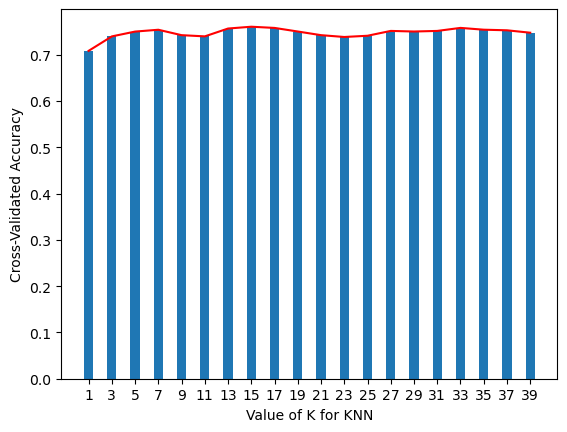

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [8]:
scores=pd.DataFrame()
scores["K_values"]=k_range
scores["Scores"]=k_scores
scores.sort_values(["Scores"],ascending=False)

,K_values,Scores
7,15,0.760458
16,33,0.757912
8,17,0.757861
6,13,0.756545
17,35,0.754033
3,7,0.753913
18,37,0.752734
13,27,0.751401
15,31,0.751384
9,19,0.750103


# Build final model

In [9]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred)


0.8051948051948052

In [10]:
from pickle import dump
from pickle import load
dump(knn,open('knn.sav','wb'))

In [11]:
loaded_model=load(open('knn.sav','rb'))
result=loaded_model.score(X,Y)
print(result)

0.7669270833333334


In [12]:

import numpy as np

In [13]:
l=[1,2,3,5,5,6,7,8]
np.array(l).shape

(8,)

In [14]:
loaded_model.predict(np.array(l).reshape(1,-1))

array([1.])

In [15]:
np.array(l).reshape(1,-1).shape

(1, 8)

In [16]:
import sklearn
sklearn.__version__

'1.3.0'

# Deploy the model

In [ ]:
!streamlit run appupdated.py